In [242]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('papers')
from astroML.sum_of_norms import sum_of_norms,norm
%matplotlib inline

# Multiple Gaussian Fitting 

Here, I want to test out fitting multiple gaussian curves to data using SciPy in the hopes of potentially applying this to $\mathrm{DEM}$ curves in an effort to better characterize the strength of the hot shoulder.

We first construct some fake data and then use the AstroML package to do multi-gaussian fitting.

In [307]:
np.random.seed()
npeaks = 2
xdata = np.linspace(0,1,1000)
ydata = np.zeros(len(xdata))
loc_saves = []
for i in range(npeaks):
    mu = np.random.rand()
    loc_saves.append(mu)
    ydata = ydata + norm(xdata,mu,0.1*np.random.rand())
ydata = ydata + 0.01*np.random.normal(size=len(xdata))

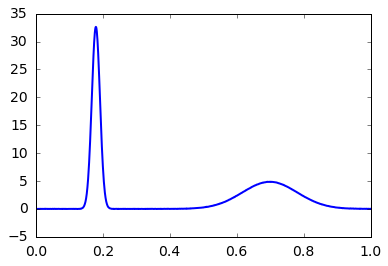

In [308]:
plt.plot(xdata,ydata)

Now do the fitting using the `AstroML` multi-gaussian fitting routine.

In [309]:
weights,rms,locs,widths = sum_of_norms(xdata,ydata,npeaks,locs=loc_saves,spacing='linear',full_output='True')

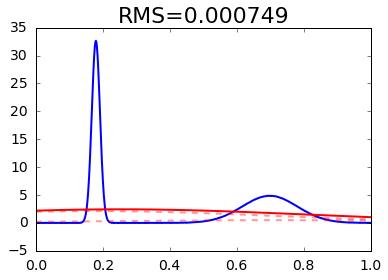

In [310]:
norms = weights*norm(xdata[:,None],locs,widths)
plt.plot(xdata,ydata)
plt.plot(xdata,norms,linestyle='--',color='r',alpha=0.4)
plt.plot(xdata,norms.sum(1),color='r')
plt.title(r'RMS=%f'%rms)

## EM Testing

Let's test this approach on an $\mathrm{EM}$ distribution.

In [319]:
temp = np.loadtxt('EBTEL/ebtel_data/hp1_compare_tau200.0_q10.0_dem.txt')
T,EM = temp[:,0],temp[:,4]
ninf = np.where(np.isinf(EM) == False)[0]
T,EM = T[ninf],EM[ninf]

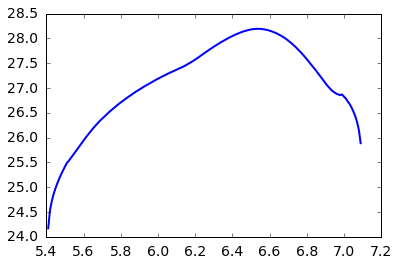

In [320]:
plt.plot(T,EM)

In [358]:
npeaks=3
locs_apriori = [5.8,6.6,7.0]
weights,rms,locs,widths = sum_of_norms(T,EM,num_gaussians=npeaks,locs=locs_apriori,full_output='True')

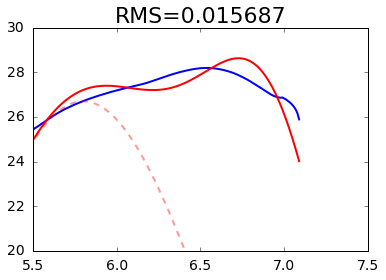

In [359]:
norms = weights*norm(T[:,None],locs,widths)
plt.plot(T,EM)
plt.plot(T,norms,linestyle='--',color='r',alpha=0.4)
plt.plot(T,norms.sum(1),color='r')
plt.ylim([20,30])
plt.xlim([5.5,7.5])
plt.title(r'RMS=%f'%rms)